# Problem 4
### 1.

In [80]:
import numpy as np
import random

def coins_w_sensor(sims):

    flips = [(random.choice(['H', 'T']), random.choice(['H', 'T'])) for _ in range(sims)]   # Simulate two coin flips
    pairs = ['equal' if flip[0] == flip[1] else 'different' for flip in flips]  # Determine if they are equal or different, instead of 0/1
    #print(pairs)

    reports = []
    for i in range(len(pairs)):
        R = random.random()
        #print(R)
        if R <= 0.9:    # 90% chance to report correctly
            reports.append(pairs[i]) # Keep same result
        else:
            reports.append('equal' if pairs[i] == 'different' else 'different') # Flip result

    return pairs, reports

pair, report = coins_w_sensor(10**6) # 10^6 simulations
#print(report)

### 2.

In [81]:
print(f"P(R=1) (report equal) = {report.count('equal') / len(report)}")
print(f"P(equal | R=1) = {sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal')}")

P(R=1) (report equal) = 0.500317
P(equal | R=1) = 0.8996236386131193


### 3.

The differences between the values above and the analytic values found in Part I are very close, differing absolutely by only:

In [82]:
print(f"Absolute difference to P(R=1): {np.abs(0.5 - report.count('equal') / len(report))}")
print(f"Absolute difference to P(equal | R=1): {np.abs(0.9 - sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal'))}")

Absolute difference to P(R=1): 0.0003170000000000117
Absolute difference to P(equal | R=1): 0.0003763613868806859


### 4.

Conditioning on a noisy report can change posterior probabibilities significantly even with a low noise rate because the probability space shifts to dealing with new events. In our example, the original probability is 50/50, but once we knew that one of the events had occurred, the test was (still) 90% accurate. Even if the original probability was much lower, say 1%, once the report has occurred, we are now considering the probability of true positives versus false positives, which is NOT the original probability space of the event in the first place.

# Problem 5

Using random uniform distributions, the value of the randomly generated number will serve as the determining factor for passing or failing each stage of inspection. Lower than the defined probability and it will pass, higher and it will fail.

In [83]:
import random
import matplotlib.pyplot as plt

def two_stage_screen(init_good_prob):

    item = '' 
    fail = False

    R1 = random.random()
    if R1 <= init_good_prob: # initial probability for good
        item = 'good'
    else:
        item = 'bad'

    # Stage 1 screening (all items)
    if item == 'good':
        R2a = random.random() # Use different random number for good and bad for clarity
        if R2a <= 0.08:
            fail = True
    else: # item == 'bad'
        R2b = random.random()
        if R2b <= 0.95:
            fail = True

    # Stage 2 screening
    if fail: # Only proceed to stage 2 if failed stage 1
        if item == 'good':
            R3a = random.random()
            if R3a <= 0.98: # Pass probability (not fail)
                fail = False # Switch to pass
        else: # item == 'bad'
            R3b = random.random()
            if R3b <= 0.05:
                fail = False


    return item, fail

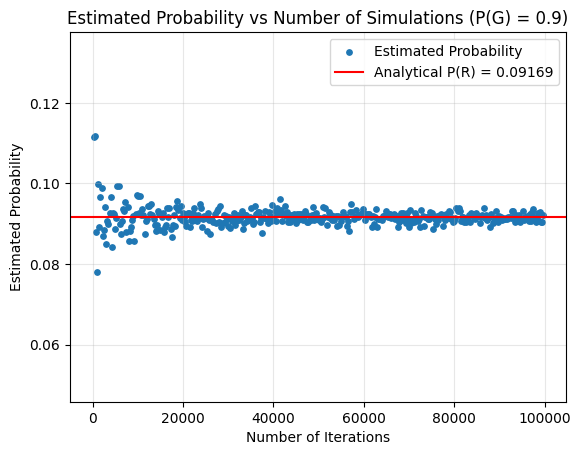

In [84]:
# Define analytical probabilities for P(G) = 0.9
analytical_prob_09 = 0.09169

# P(G) = 0.9
sims = [i for i in range(1, 10**5, 250)]
probabilities_09 = []
relative_errors_09 = []

for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.9)  # Change initial P(G) here
        if fail:
            fail_count += 1

    estimated_prob = fail_count / sims[i]
    probabilities_09.append(estimated_prob)
    relative_errors_09.append(abs(estimated_prob - analytical_prob_09) / analytical_prob_09)

# Plotting estimated probabilities vs number of iterations for P(G) = 0.9
plt.figure()
plt.scatter(sims, probabilities_09, s=15, label='Estimated Probability')
plt.axhline(y=analytical_prob_09, color='r', label='Analytical P(R) = 0.09169')
plt.ylim(analytical_prob_09 / 2, analytical_prob_09 * 1.5)  # Set consistent y-axis scale
plt.xlabel('Number of Iterations')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations (P(G) = 0.9)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

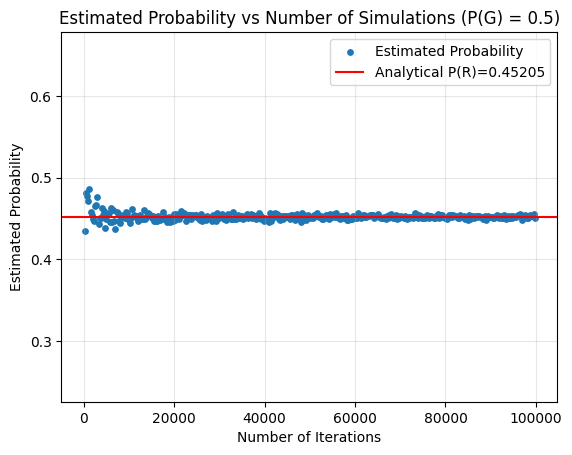

In [85]:
# Define analytical probabilities for P(G) = 0.5
analytical_prob_05 = 0.45205

probabilities_05 = []
relative_errors_05 = []

for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.5)  # Change initial P(G) here
        if fail:
            fail_count += 1

    estimated_prob = fail_count / sims[i]
    probabilities_05.append(estimated_prob)
    relative_errors_05.append(abs(estimated_prob - analytical_prob_05) / analytical_prob_05)

# Plotting estimated probabilities vs number of iterations for P(G) = 0.5
plt.figure()
plt.scatter(sims, probabilities_05, s=15, label='Estimated Probability')
plt.axhline(y=analytical_prob_05, color='r', label='Analytical P(R)=0.45205')
plt.ylim(analytical_prob_05 / 2, analytical_prob_05 * 1.5)  # Set consistent y-axis scale
plt.xlabel('Number of Iterations')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations (P(G) = 0.5)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

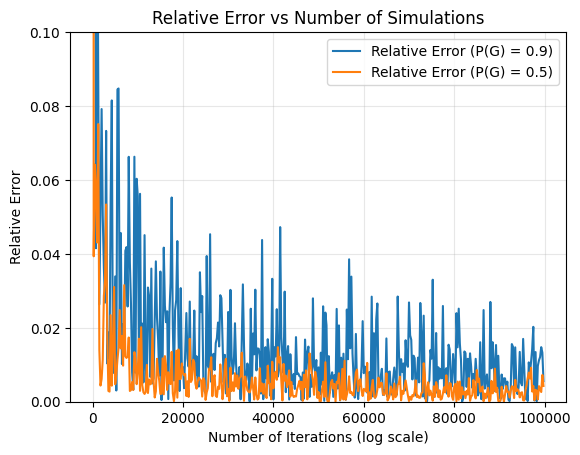

In [86]:
# Plotting relative error for P(G) = 0.9 and P(G) = 0.5
plt.figure()
plt.plot(sims, relative_errors_09, label='Relative Error (P(G) = 0.9)')
plt.plot(sims, relative_errors_05, label='Relative Error (P(G) = 0.5)')
plt.ylim(0, 0.1)
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Number of Simulations')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()